In [1]:
import cabean
import biolqm
from colomoto_jupyter import tabulate

This notebook has been executed using the docker image `colomoto/colomoto-docker:2020-07-01`

Import the Bladder Cancer model from Remy et al. 2015 (DOI: 10.1158/0008-5472.CAN-15-0602).

In [2]:
model = biolqm.load("http://ginsim.org/sites/default/files/Bladder_Model.zginml")

Downloading http://ginsim.org/sites/default/files/Bladder_Model.zginml

Set the initial condition: assign initial values to some of the input nodes.

In [3]:
inputs = {
    "EGFR_stimulus": 1,
    "FGFR3_stimulus": 1,
    "GrowthInhibitors": 1
}

Use the decompositon-based attractor detection method to identify all the exact attractors of the network under the initial condition defined above.

In [4]:
attractors = cabean.attractors(model, inputs)
tabulate(attractors)

,AKT,ATM_b1,ATM_b2,Apoptosis_b1,Apoptosis_b2,CDC25A,CHEK1_2_b1,CHEK1_2_b2,CyclinA,CyclinD1,CyclinE1,DNAdamage,E2F1_b1,E2F1_b2,E2F3_b1,E2F3_b2,EGFR,EGFR_stimulus,FGFR3,FGFR3_stimulus,GRB2,GrowthInhibitors,Growth_Arrest,MDM2,PI3K,PTEN,Proliferation,RAS,RB1,RBL2,SPRY,TP53,p14ARF,p16INK4a,p21CIP
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1
2,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0
3,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,1,1,0,0,1,0,1,0,1,1,1,0,1,1


Define the properties of the source and target attractors. Note that source or target may correspond to serveral attractors.

In [5]:
source = {"Proliferation": 1}
target = {"Apoptosis_b1": 1, "RB1": 1}

Compute the minimal one-step instantaneous control (OI) from the source to the target.

In [6]:
r1i = cabean.OneStep_Instantaneous(model, inputs)
%time s1i = r1i.attractor_to_attractor(source, target)
s1i

CPU times: user 2.03 ms, sys: 2.02 ms, total: 4.05 ms
Wall time: 660 ms


[
 FromSteadyState('a2', InstantaneousPerturbation(CyclinA=0, CyclinE1=0, DNAdamage=1, RB1=1, p16INK4a=0, p21CIP=1))]

In [7]:
s1i.as_table()

,CyclinA,CyclinE1,DNAdamage,RB1,p16INK4a,p21CIP
0,0,0,1,1,0,1


Compute the attractor-based sequential instantaneous control (ASI) from the source to the target.

In [8]:
ri = cabean.AttractorSequential_Instantaneous(model, inputs)
%time si = ri.attractor_to_attractor(source, target)
si

CPU times: user 1.13 ms, sys: 4.14 ms, total: 5.27 ms
Wall time: 1.68 s


[
 FromSteadyState('a2', InstantaneousPerturbation(CyclinA=0, CyclinE1=0, DNAdamage=1, RB1=1, p16INK4a=0, p21CIP=1)),
 
 FromSteadyState('a2', InstantaneousPerturbation(CyclinA=0, CyclinE1=0, RB1=1, p16INK4a=0, p21CIP=1), 
     FromSteadyState('a0', InstantaneousPerturbation(DNAdamage=1))),
 
 FromSteadyState('a2', InstantaneousPerturbation(CyclinE1=0, RBL2=1), 
     FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=1, RB1=1, p16INK4a=0))),
 
 FromSteadyState('a2', InstantaneousPerturbation(CyclinE1=0, p21CIP=1), 
     FromSteadyState('a1', InstantaneousPerturbation(DNAdamage=1, RB1=1, p16INK4a=0))),
 
 FromSteadyState('a2', InstantaneousPerturbation(CyclinE1=0, RBL2=1), 
     FromSteadyState('a1', InstantaneousPerturbation(RB1=1, p16INK4a=0), 
         FromSteadyState('a0', InstantaneousPerturbation(DNAdamage=1)))),
 
 FromSteadyState('a2', InstantaneousPerturbation(CyclinE1=0, p21CIP=1), 
     FromSteadyState('a1', InstantaneousPerturbation(RB1=1, p16INK4a=0), 
         FromS

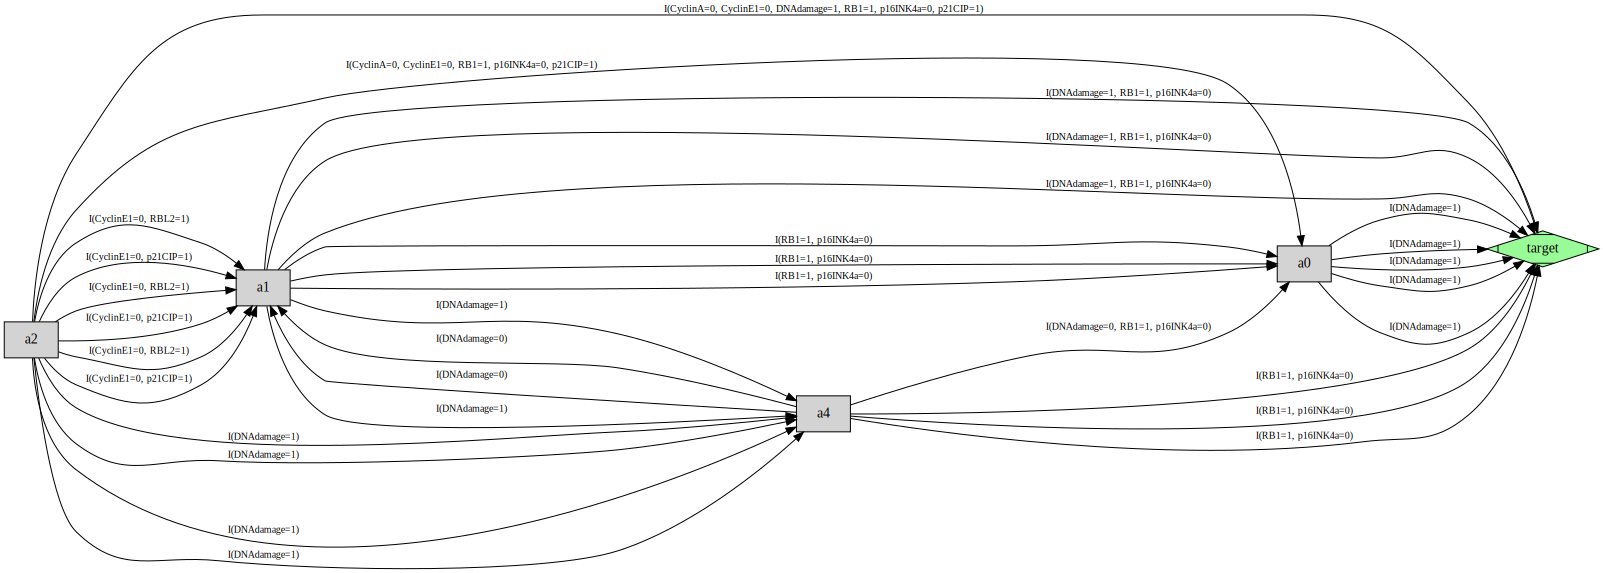

In [9]:
si.as_graph()

In [10]:
si.as_table()

,CyclinA,CyclinE1,DNAdamage,RB1,RBL2,p16INK4a,p21CIP
0,,,*,1,,0,
1,,,1,1,,0,
2,,0,1,1,,0,1
3,,0,1,1,1,0,
4,0,0,1,1,,0,1


Compute the minimal one-step temporary control (OT) from the source to the target.

In [11]:
r1t = cabean.OneStep_Temporary(model, inputs)
%time s1t = r1t.attractor_to_attractor(source, target)
s1t

CPU times: user 1.76 ms, sys: 2.45 ms, total: 4.21 ms
Wall time: 736 ms


[FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1, RB1=1)),
 FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1, p16INK4a=0))]

In [12]:
s1t.as_table()

,DNAdamage,RB1,p16INK4a
0,1,,0
1,1,1,


Compute the attractor-based sequential temporary control (AST) from the source to the target.

In [13]:
rt = cabean.AttractorSequential_Temporary(model, inputs)
%time st = rt.attractor_to_attractor(source, target)
st

CPU times: user 1.82 ms, sys: 2.89 ms, total: 4.72 ms
Wall time: 1.63 s


[FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1, RB1=1)),
 FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1, p16INK4a=0)),
 
 FromSteadyState('a2', TemporaryPerturbation(RB1=1), 
     FromSteadyState('a0', TemporaryPerturbation(DNAdamage=1))),
 
 FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1), 
     FromSteadyState('a4', TemporaryPerturbation(RB1=1))),
 
 FromSteadyState('a2', TemporaryPerturbation(DNAdamage=1), 
     FromSteadyState('a4', TemporaryPerturbation(p16INK4a=0)))]

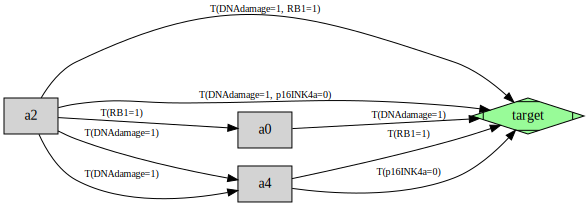

In [14]:
st.as_graph()

In [15]:
st.as_table()

,DNAdamage,RB1,p16INK4a
0,1,,0
1,1,1,


Compute the minimal one-step permanent control (OP) from the source to the target.

In [16]:
r1p = cabean.OneStep_Permanent(model, inputs)
%time s1p = r1p.attractor_to_attractor(source, target)
s1p

CPU times: user 1.88 ms, sys: 2.52 ms, total: 4.4 ms
Wall time: 743 ms


[FromSteadyState('a2', PermanentPerturbation(DNAdamage=1, RB1=1)),
 FromSteadyState('a2', PermanentPerturbation(DNAdamage=1, p16INK4a=0))]

In [17]:
s1p.as_table()

,DNAdamage,RB1,p16INK4a
0,1,,0
1,1,1,


Compute the attractor-based sequential permanent control (ASP) from the source to the target.

In [18]:
rp = cabean.AttractorSequential_Permanent(model, inputs)
%time sp = rp.attractor_to_attractor(source, target)
sp

CPU times: user 2.49 ms, sys: 2.29 ms, total: 4.78 ms
Wall time: 1.93 s


[FromSteadyState('a2', PermanentPerturbation(DNAdamage=1, RB1=1)),
 FromSteadyState('a2', PermanentPerturbation(DNAdamage=1, p16INK4a=0)),
 
 FromSteadyState('a2', PermanentPerturbation(RB1=1), 
     FromSteadyState('a0', PermanentPerturbation(DNAdamage=1))),
 
 FromSteadyState('a2', PermanentPerturbation(DNAdamage=1), 
     FromSteadyState('a4', PermanentPerturbation(RB1=1))),
 
 FromSteadyState('a2', PermanentPerturbation(DNAdamage=1), 
     FromSteadyState('a4', PermanentPerturbation(p16INK4a=0)))]

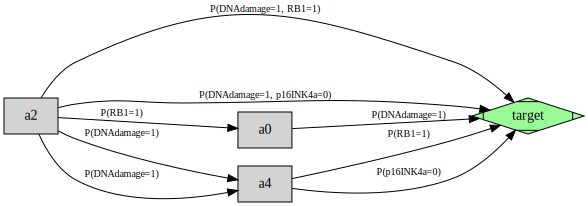

In [19]:
sp.as_graph()

In [20]:
sp.as_table()

,DNAdamage,RB1,p16INK4a
0,1,,0
1,1,1,
